In [1]:
import json
import pickle
import numpy as np
# from utils import *
from pprint import pprint
from scipy.stats import sem
from statistics import mean, stdev
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
%matplotlib inline
colors = ['gray', 'gold']
hatches = ['oo', r'\\']

# fig_dir = get_full_path("MTL", "Figures")

In [2]:
numGroups = 3
ind = np.arange(numGroups) # x locations for the groups

In [3]:
caida_lengths = [5380, 5380, 5380, 6230, 6230, 6230, 5074, 5074, 5074, 4620, 4620, 4620, 5030, 5030, 5030, 5586, 5586, 5586, 4122, 4122, 4122,
 7032, 7032, 7032, 5466, 5466, 5466, 4780, 4780, 4780, 4554, 4554, 4554, 4110, 4110, 4110, 4224, 4224, 4224, 4438, 4438, 4438, 5954, 5954, 5954, 5368, 5368, 5368, 4812, 4812, 4812, 5458, 5458, 5458, 6866, 6866, 6866, 6166, 6166,
 6166, 4648, 4648, 4648, 5476, 5476, 5476, 5086, 5086, 5086, 6826, 6826, 6826, 6432, 6432, 6432,
 7030, 7030, 7030, 4192, 4192, 4192, 5758, 5758, 5758]
caida_err = sum(caida_lengths) / len(caida_lengths)
caida_err = caida_err**0.5

caida_err = 73.36747040947857

caida_err = 29 ** 0.5

ripe_err = 100 ** 0.5

In [4]:
caida_stl_times = {'loss': 135.4, 'congestion': 143.4, 'noise': 96.15, 'changepoint': 52.3}
ripe_stl_times = {'loss': 192.7, 'congestion': 197.3, 'noise': 203.2, 'changepoint': 208.6}
caida_stl_time_devs = {'loss': 8.22, 'congestion': 8.8, 'noise': 11.02, 'changepoint': 5.84}
ripe_stl_time_devs = {'loss': 0.865, 'congestion': 0.85, 'noise': 0.987, 'changepoint': 0.637}

caida_mtl_time = 31.72
ripe_mtl_time = 170.1
caida_mtl_dev = 8.89
ripe_mtl_dev = 2.76

caida_task1_series = caida_stl_times['noise'] + caida_stl_times['changepoint'] + caida_stl_times['congestion']
caida_task1_parallel = max([caida_stl_times['noise'], caida_stl_times['changepoint'], caida_stl_times['congestion']])

caida_task2_series = caida_stl_times['noise'] + caida_stl_times['changepoint'] + caida_stl_times['loss']
caida_task2_parallel = max([caida_stl_times['noise'], caida_stl_times['changepoint'], caida_stl_times['loss']])

caida_data = [caida_task1_series, caida_task2_series, caida_task1_parallel, caida_task2_parallel, \
              caida_mtl_time, caida_mtl_time]


ripe_task1_series = caida_stl_times['noise'] + caida_stl_times['changepoint'] + caida_stl_times['congestion']
ripe_task1_parallel = max([caida_stl_times['noise'], caida_stl_times['changepoint'], caida_stl_times['congestion']])

ripe_task2_series = ripe_stl_times['noise'] + ripe_stl_times['changepoint'] + ripe_stl_times['loss']
ripe_task2_parallel = max([ripe_stl_times['noise'], ripe_stl_times['changepoint'], ripe_stl_times['loss']])

ripe_data = [ripe_task1_series, ripe_task2_series, ripe_task1_parallel, ripe_task2_parallel, \
              ripe_mtl_time, ripe_mtl_time]

caida_stderrs = [i / caida_err for i in caida_stl_time_devs.values()] 
ripe_stderrs = [i / ripe_err for i in ripe_stl_time_devs.values()] 

# print(ripe_stderrs)

c_task1_stderr = (sum(caida_stderrs) - 0.001527090327631736) / 3 # subtract loss
c_task2_stderr = (sum(caida_stderrs) - 0.0016348412266617126) / 3 # subtract congestion
c_mtl_stderr = caida_mtl_dev / caida_err
r_mtl_stderr = ripe_mtl_dev / ripe_err

# c_mtl_stderr

caida_standard_errors = [c_task1_stderr, c_task2_stderr, c_task1_stderr, c_task2_stderr, c_mtl_stderr, c_mtl_stderr]

print(caida_standard_errors)

r_task1_stderr = sum(ripe_stderrs) - 0.005470740352091295
r_task2_stderr = sum(ripe_stderrs) - 0.005375872022286244

ripe_std_err = [sum(ripe_stderrs), r_task2_stderr, r_task1_stderr, r_task2_stderr, r_mtl_stderr, r_mtl_stderr]
# print(ripe_std_err)

[2.0966103223702954, 2.096574405403952, 2.0966103223702954, 2.096574405403952, 1.6508315563939913, 1.6508315563939913]


In [5]:
def autolabel(rects, index):
    """
    Attach a text label above each bar displaying its height
    """
    for i in range(len(rects)):
        rect = rects[i]
        height = rect.get_height()
        
        if stderrs != []:
            myError = stderrs[i]
        else:
            myError = 0
        
        margin = 0.005
        margin = 0.0025
        
        if height >= LB:
            ax.text(rect.get_x() + rect.get_width() / 2.0, height + myError + margin,
                    f'{round(height, 3):.1f}s',
                    ha='center', va='bottom', fontsize=8)

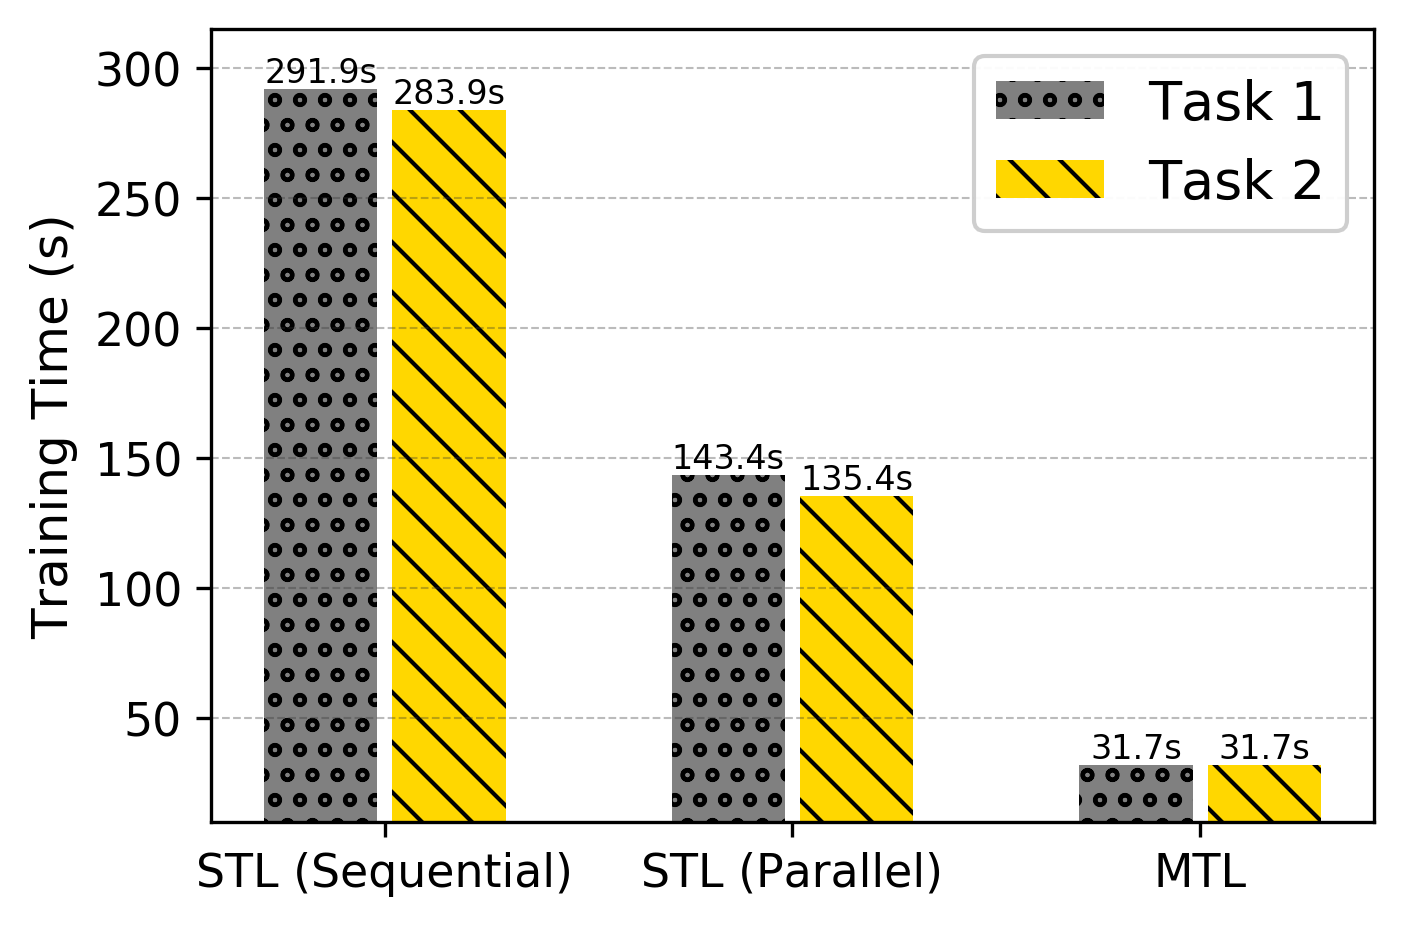

In [6]:
margin = 0.1 # space between the bars

# fig = plt.figure()
# print(plt.rcParams.get('figure.figsize'))
fig = plt.figure(figsize=(5, 3.5)) # default (base)
# fig = plt.figure(figsize=(8, 4)) # good for all queries

ax = fig.add_subplot(111)
width = 0.75 # bar width

rects = {}
FONTSIZE = 11



for i in range(6):
    stderrs = caida_standard_errors
    stderrs = []
    
    data = caida_data[i]
    rects[i] = ax.bar(i // 2 + (width * i) + (margin * i), data, width, color=colors[i % 2], hatch=hatches[i % 2])
    
    if stderrs != []:
        thickness = 1
        rects[i] = ax.bar(i // 2 + (width * i) + (margin * i), data, width, color=colors[i % 2], yerr=stderrs[i], \
                          hatch=hatches[i % 2], error_kw=dict(ecolor='red', lw=thickness, capsize=3, capthick=thickness))


        
fntsize = 13    
LOC = "upper right"
    
ax.legend( (rects[0], rects[1]), ('Task 1', 'Task 2'), loc=LOC, framealpha=0.95, fontsize=fntsize)


# ax.set_xlabel('Model Format', fontsize=FONTSIZE + 3)
# ax.set_ylabel('F1 Score', fontsize=FONTSIZE + 1)
ax.set_ylabel('Training Time (s)', fontsize=FONTSIZE + 1)



# ax.set_xticks(ind + (width + margin) / 2)
# ax.set_xticks([i + (width * i * 2 + margin * i) for i in range(3)])
# ax.set_xticks([i - (width / 2) + (width * (i+1) * 2 + margin * i) for i in range(3)])

# ax.set_xticks([i * width * 5 for i in range(3)])
ax.set_xticks([width / 2 + margin / 2, width * 4 + margin * 1.25, width * 7.5 + margin * 2])


ax.set_xticklabels( ('STL (Sequential)', 'STL (Parallel)', 'MTL'))
plt.grid(color='#333333', linestyle='--', linewidth=0.5, axis='y', alpha=0.33)
fig.set_dpi(300)

ax.tick_params(axis='both', labelsize=FONTSIZE)
SMALL_SIZE = 8
# plt.rc('xtick', labelsize=SMALL_SIZE)
# plt.rc('ytick', labelsize=SMALL_SIZE)

LB, UB = (10, 315)
ax.set_ylim([LB, UB]) # lower, upper bounds of the y-axis


[autolabel(rects[i], i) for i in range(6)]

# plt.savefig("./Figures/naive_caida_timing.png", dpi=600, 
#                   facecolor='w',                                                
#                   edgecolor='w',
#                   orientation='portrait', 
#                   papertype=None,                                  
#                   format=None,                                
#                   transparent=False,     
#                   bbox_inches=None,                
#                   pad_inches=0.1
#                   )

plt.show()

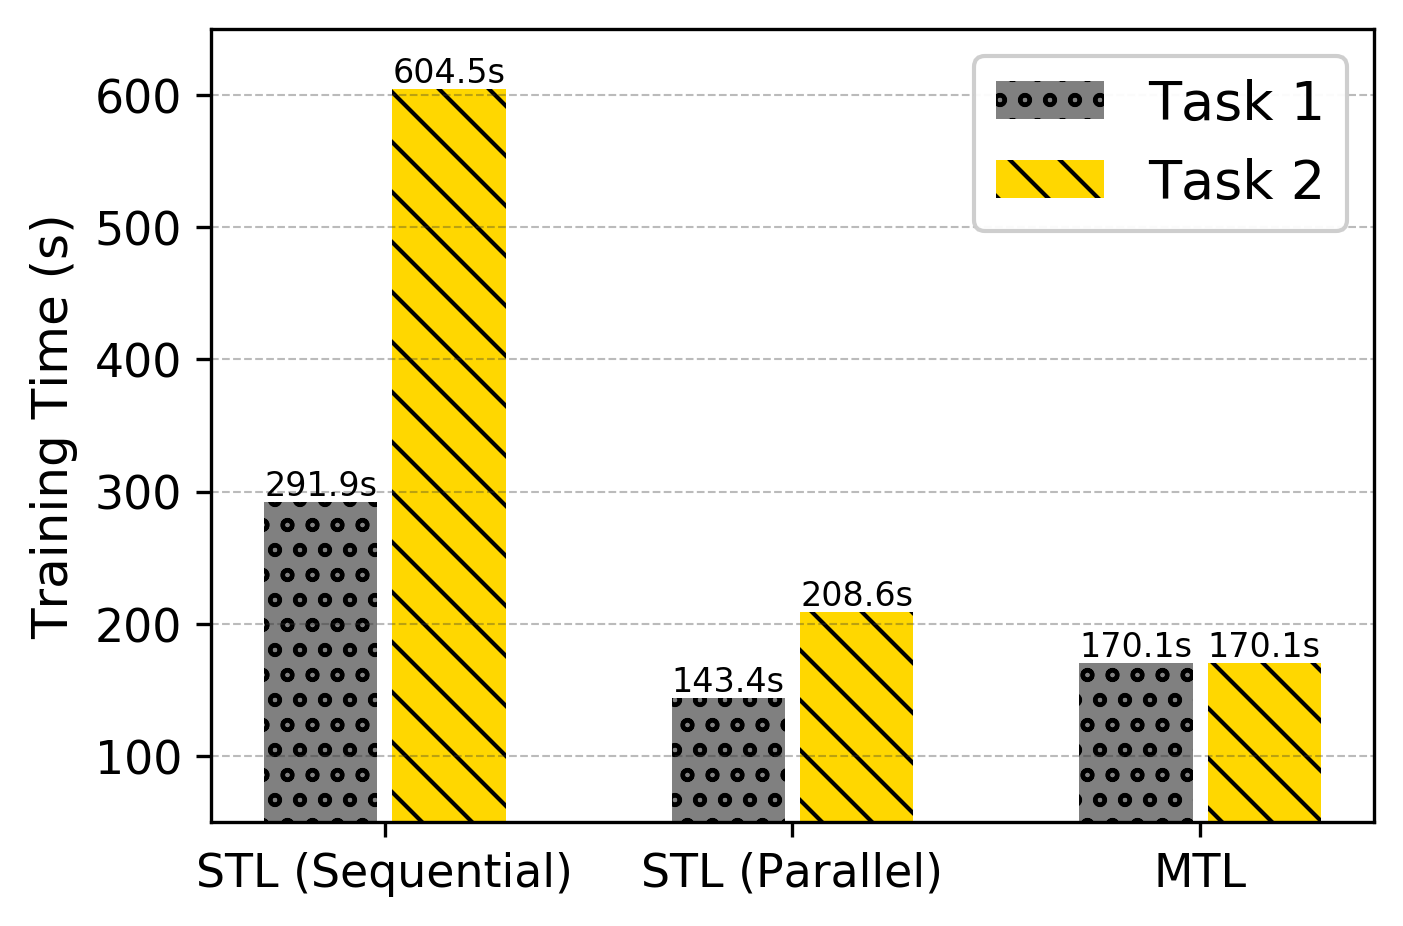

In [203]:
margin = 0.1 # space between the bars
fig = plt.figure(figsize=(5, 3.5)) # good for all queries

ax = fig.add_subplot(111)
width = 0.75 # bar width

# data = ripe_data
# stderrs = ripe_stderrs


rects = {}
FONTSIZE = 11



for i in range(6):
    
#     stderrs = ripe_std_err
    stderrs = []
    data = ripe_data[i]
    
    rects[i] = ax.bar(i // 2 + (width * i) + (margin * i), data, width, color=colors[i % 2], hatch=hatches[i % 2])
    
    if stderrs != []:
        thickness = 1
        rects[i] = ax.bar(i // 2 + (width * i) + (margin * i), data, width, color=colors[i % 2], yerr=stderrs[i], \
                          hatch=hatches[i % 2], error_kw=dict(ecolor='red', lw=thickness, capsize=3, capthick=thickness))


        
fntsize = 13    
LOC = "upper right"

    
ax.legend( (rects[0], rects[1]), ('Task 1', 'Task 2'), loc=LOC, framealpha=0.95, fontsize=fntsize)
ax.set_ylabel('Training Time (s)', fontsize=FONTSIZE + 1)




# ax.set_xticks([i + ((width * (i + 0.33) * 2) + (margin * i * 1.33)) for i in range(3)])
ax.set_xticks([width / 2 + margin / 2, width * 4 + margin * 1.25, width * 7.5 + margin * 2])




ax.set_xticklabels( ('STL (Sequential)', 'STL (Parallel)', 'MTL'))
plt.grid(color='#333333', linestyle='--', linewidth=0.5, axis='y', alpha=0.33)
fig.set_dpi(300)

ax.tick_params(axis='both', labelsize=FONTSIZE)
SMALL_SIZE = 8
# plt.rc('xtick', labelsize=SMALL_SIZE)
# plt.rc('ytick', labelsize=SMALL_SIZE)

LB, UB = (50, 650)
ax.set_ylim([LB, UB]) # lower, upper bounds of the y-axis


[autolabel(rects[i], i) for i in range(6)]


plt.savefig("./Figures/ripe_timing.png", dpi=600, 
                  facecolor='w',                                                
                  edgecolor='w',
                  orientation='portrait', 
                  papertype=None,                                  
                  format=None,                                
                  transparent=False,     
                  bbox_inches=None,                
                  pad_inches=0.1
                  )

plt.show()

plt.show()